<a href="https://colab.research.google.com/github/RizqSaputra/Data-Mining/blob/main/Assesment_BNSP_Muhammad_Rizq_Saputra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Import Library**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import Image, display, Markdown
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

In [ ]:
Image(url="https://www.datascience-pm.com/wp-content/uploads/2021/02/CRISP-DM.png", width=800, height=600)

Alur pengerjaan dalam analsis data ini menggunakan metode **CRISP-DM** seperti gambar diatas


- Business understanding – Kebutuhan Bisnis
- Data understanding – Data apa yang kita miliki / butuhkan? Apakah bersih?
- Data preparation – Bagaimana kita mengatur data untuk pemodelan?
- Modeling – Teknik Pemodelan apa yang digunakan
- Evaluation – Model mana yang paling sesuai dengan tujuan bisnis?
- Deployment – Bagaimana Stakeholder mengakses hasilnya?

#**Business Understanding**

## Latar Belakang
Dataset ini tentang Customer churn  atau kehilangan pelanggan adalah salah satu masalah terbesar dalam bisnis, terutama pada industri telekomunikasi yang memiliki persaingan yang sangat ketat. Penelitian menunjukkan bahwa rata-rata churn rate bulanan di antara 4 operator nirkabel teratas di AS adalah 1,9% - 2%. Customer churn rate merupakan isu penting bagi perusahaan telekomunikasi karena persentase pelanggan yang hilang tersebut sangat memengaruhi growth rate perusahaan.


## Tujuan
Melakukan prediksi terhadap kemungkinan terjadinya customer churn. Diharapkan pemodelan yang dihasilkan dapat membantu perusahaan dalam memahami berapa banyak pelanggan yang meninggalkan bisnis, dan mengapa mereka keluar.Ini penting dalam menyusun strategi pemasaran dan retensi pelanggan perusahaan

#**Data Understanding**

In [ ]:
link = 'https://raw.githubusercontent.com/arubhasy/dataset/main/Telco-Customer-Churn.csv'
df = pd.read_csv(link)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,F,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
print("Total Jumlah Data : ",len(df))

Total Jumlah Data :  7043


**Informasi Pada Setiap Kolom Dataset**
- customerID : id Pelanggan
- gender : Jenis Kelamin
- SeniorCitizen :  pelanggan adalah warga negara lanjut usia atau bukan
(1 = lanjut usia,
0 = bukan)
- Partner : pelanggan memiliki mitra atau tidak (Yes, No)
- Dependents : pelanggan memiliki tanggungan atau tidak (Yes, No)
- tenure : Jumlah bulan pelanggan menetap
- PhoneService : pelanggan memiliki layanan telepon atau tidak (Yes, No)
- MultipleLines : pelanggan memiliki banyak baris atau tidak (Yes, No)
- InternetService : Pelanggan internet service provider (DSL, Fiber optic, No)
- OnlineSecurity : pelanggan memiliki keamanan online atau tidak (Yes, No)
- OnlineBackup : pelanggan memiliki cadangan online atau tidak (Yes, No)
- DeviceProtection : pelanggan memiliki cadangan online atau tidak (Yes, No)
- TechSupport : pelanggan memiliki dukungan teknis atau tidak (Yes, No)
- StreamingTV : pelanggan memiliki TV streaming atau tidak (Yes, No)
- StreamingMovies :  pelanggan telah melakukan streaming film atau tidak (Yes, No)
- Contract : jangka waktu kontrak pelanggan (Month-to-month, One year,
Two year)
- PaperlessBilling :  pelanggan memiliki paperless billing atau tidak (Yes, No)
- PaymentMethod : metode pembayaran pelanggan ((Electronic check, Mailed
check, Bank transfer (automatic), Credit card (automatic)))
- MonthlyCharges : Tagihan Bulanan
- TotalCharges : Jumlah total tagihan
- **Churn : kehilangan pelanggan atau tidak (Yes,No) Variabel Target**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7038 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7040 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7040.000000,7043.000000
mean,0.162147,35.043892,64.761692
std,0.368612,115.282871,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,7100.000000,118.750000


In [ ]:
categorical  =list(df.select_dtypes(include = ['object']).columns)
print("Kolom Kategorikal")
display(categorical)
numerical  =list(df.select_dtypes(include = ['number']).columns)
print("\nKolom Numerik")
display(numerical)

Kolom Kategorikal


['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']


Kolom Numerik


['SeniorCitizen', 'tenure', 'MonthlyCharges']

In [ ]:
df[categorical].nunique()

customerID          7043
gender                 4
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
TotalCharges        6531
Churn                  2
dtype: int64

In [ ]:
# Menentukan kolom-kolom yang tidak ingin ditampilkan
kolom_numeric = ['customerID','tenure', 'MonthlyCharges','TotalCharges']

# Memilih semua kolom kecuali kolom-kolom yang dikecualikan
selected_columns = df.drop(columns=kolom_numeric)

# Melihat nilai unik pada kolom-kolom yang dipilih
print("Kolom Unique\n")
for column in selected_columns.columns:
    unique_values = selected_columns[column].unique()
    print(f'{column} : {unique_values}')

Kolom Unique

gender : ['F' 'Male' 'Female' 'M' nan]
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


No     5174
Yes    1869
Name: Churn, dtype: int64


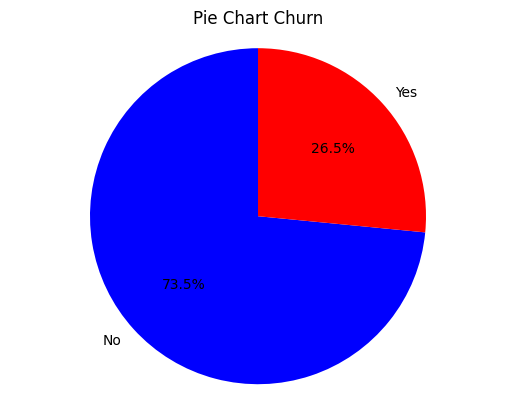

In [ ]:
# Visualisasi Pie Chart

churn = df['Churn'].value_counts()
print(churn)
labels = churn.index
sizes = churn.values
colors = ['blue', 'red']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Agar pie chart terlihat bulat
plt.title('Pie Chart Churn')
plt.show()


26,5% kehilangan pelanggan
Maka tugas Mengatasi agar pelanggan tidak terjadi kehilangan pelanggan

#**Data Processing**

In [ ]:
# Merubah kolom TotalCharges menjadi numerik
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [ ]:
# Merubah kolom SeniorCitizen menjadi Kategorikal
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

In [ ]:
df.isna().sum()

customerID           0
gender               5
SeniorCitizen        0
Partner              0
Dependents           0
tenure               3
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
missing_value_percentage = pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Percentage'])
missing_value_percentage

,Percentage
customerID,0.000000
gender,0.070992
SeniorCitizen,0.000000
Partner,0.000000
Dependents,0.000000
tenure,0.042595
PhoneService,0.000000
MultipleLines,0.000000
InternetService,0.000000
OnlineSecurity,0.000000


Karena persentasenya rendah maka saya hapus saja

In [ ]:
# Hapus Missing Value
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# Mengonversi semua kolom menjadi huruf kecil
df.columns = df.columns.str.lower()
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [ ]:
# Mengganti nilai 'F' dengan 'Female' dan 'M' dengan 'Male'
df['gender'] = df['gender'].replace({'F': 'Female', 'M': 'Male'})

# Melihat nilai unik pada kolom 'gender' setelah penggantian
print("Kolom Gender setelah di replace")
print(df['gender'].unique())

Kolom Gender setelah di replace
['Female' 'Male']


In [ ]:
# Menghapus kolom yang tidak penting
columns_drop = ['customerid',]
df = df.drop(columns=columns_drop)

In [ ]:
df.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Converting Categorical columns to dummy variables
df['churn'].replace(to_replace='Yes', value=1, inplace=True)
df['churn'].replace(to_replace='No',  value=0, inplace=True)

In [ ]:
# Encoding use one hot encoder
df_model = pd.get_dummies(df)
df_model.head()

<ipython-input-162-68eb4f34e008>:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_model = pd.get_dummies(df)


,tenure,monthlycharges,totalcharges,churn,gender_Female,gender_Male,seniorcitizen_0,seniorcitizen_1,partner_No,partner_Yes,...,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,1.0,29.85,29.85,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,34.0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2.0,53.85,108.15,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,45.0,42.30,1840.75,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,2.0,70.70,151.65,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
# # Encoding
# le = LabelEncoder()
# categorical = list(df.select_dtypes(include = ['object']).columns)

# # Membuat dictionary untuk menyimpan mapping
# encoding_mapping = {}

# # Melakukan encoding dan menyimpan mapping
# for col in categorical:
#     df_model[col] = le.fit_transform(df_model[col])
#     encoding_mapping[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# print("DataFrame setelah encoding:")
# display(df_model)

# print("\nMapping encoding:")
# display(encoding_mapping)

In [ ]:
df['churn'] = df['churn'].astype("category")

In [ ]:
numerical = list(df.select_dtypes(include = ['number']).columns)
df_model[numerical].describe()

,tenure,monthlycharges,totalcharges
count,7025.000000,7025.000000,7025.000000
mean,35.107616,64.783573,2283.251964
std,115.396389,30.077709,2266.970388
min,1.000000,18.250000,18.800000
25%,9.000000,35.550000,401.300000
50%,29.000000,70.350000,1396.900000
75%,56.000000,89.850000,3794.500000
max,7100.000000,118.750000,8684.800000


In [ ]:
# Membuat instance dari StandardScaler
scaler = StandardScaler()
df_model[numerical] = scaler.fit_transform(df_model[numerical])

In [ ]:
df_model.head()

,tenure,monthlycharges,totalcharges,churn,gender_Female,gender_Male,seniorcitizen_0,seniorcitizen_1,partner_No,partner_Yes,...,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,-0.295590,-1.161527,-0.994085,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,-0.009599,-0.260463,-0.173703,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,-0.286924,-0.363537,-0.959544,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0.085731,-0.747569,-0.195209,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,-0.286924,0.196719,-0.940354,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
# Memisahkan kolom target
X = df_model.drop('churn', axis = 1)
y = df_model['churn']
# Memisahkan data train 80% dan data testing 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print('Jumlah Data Train : ',len(X_train))
print('Jumlah Data Test : ',len(X_test))

Jumlah Data Train :  5620
Jumlah Data Test :  1405


#**EDA**

In [ ]:
# Membuat salinan DataFrame
df_clean = df.copy()
df_clean.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [ ]:
categorical = list(df.select_dtypes(include = ['object']).columns)
display(categorical)
numerical = list(df.select_dtypes(include = ['number']).columns)
display(numerical)

['gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

['tenure', 'monthlycharges', 'totalcharges']

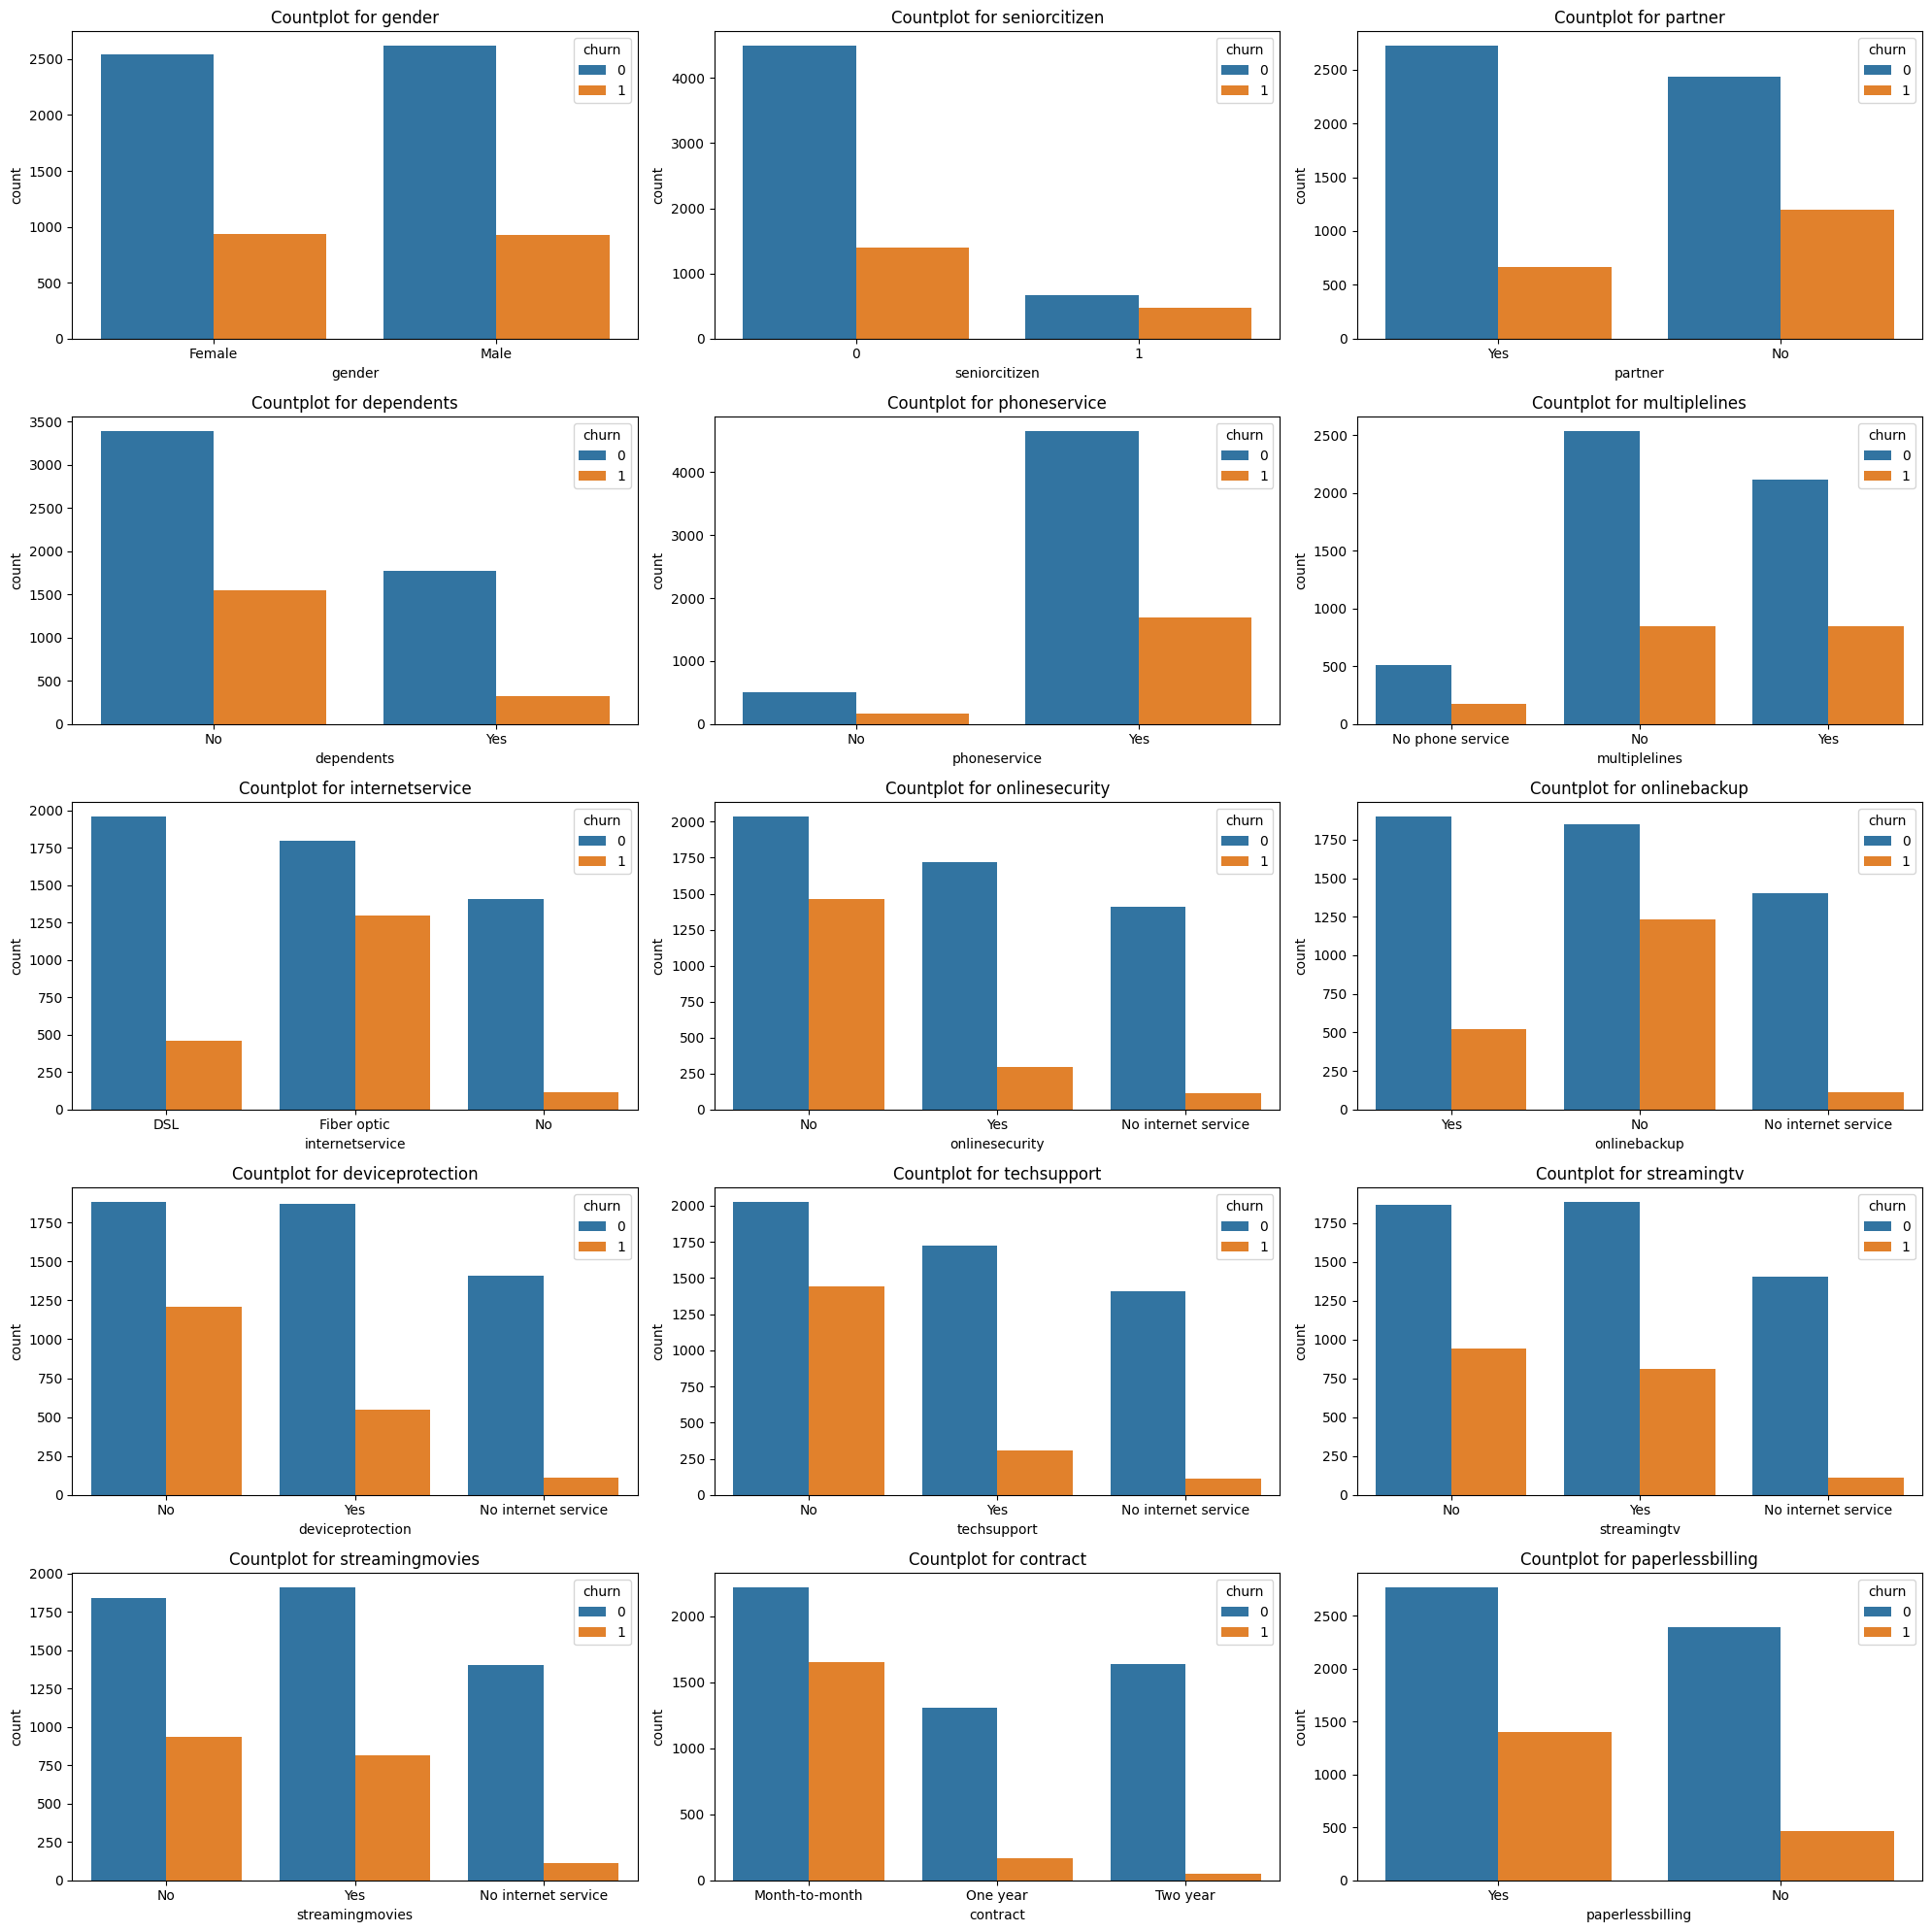

In [ ]:
# Mengatur ukuran subplot
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 20))

# Iterasi melalui setiap kolom kategorikal dan membuat countplot
for i, feature in enumerate(categorical):
    row_index = i // 3
    col_index = i % 3

    if row_index < 5:  # Memastikan indeks baris tidak melebihi jumlah baris subplot
        sns.countplot(x=feature, hue='churn', data=df, ax=axes[row_index, col_index])
        axes[row_index, col_index].set_title(f'Countplot for {feature}')
    else:
        break

# Menampilkan plot
plt.tight_layout()
plt.show()

Histogram Diatas untuk menujukkan customer churn berdasarkan kolom

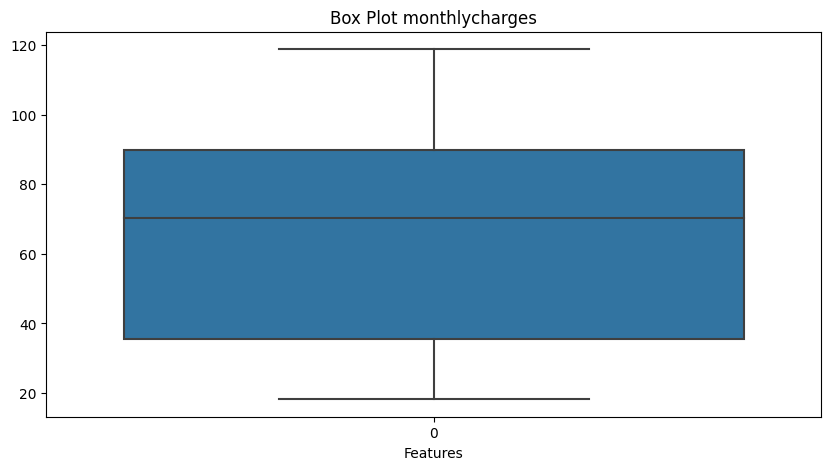

In [ ]:
# Membuat box plot menggunakan Seaborn
plt.figure(figsize=(10, 5))  # Menyesuaikan ukuran plot
sns.boxplot(data=df_clean['monthlycharges'], orient='v')

# Menambahkan label sumbu x
plt.xlabel('Features')

# Menampilkan box plot
plt.title('Box Plot monthlycharges')
plt.show()

Melihat Outlier pada box plot

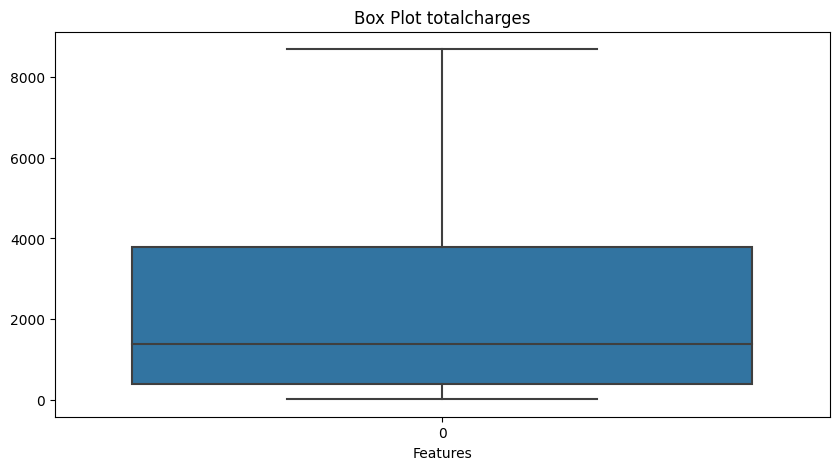

In [ ]:
# Membuat box plot menggunakan Seaborn
plt.figure(figsize=(10, 5))  # Menyesuaikan ukuran plot
sns.boxplot(data=df_clean['totalcharges'], orient='v')

# Menambahkan label sumbu x
plt.xlabel('Features')

# Menampilkan box plot
plt.title('Box Plot totalcharges')
plt.show()

Melihat Outlier pada box plot

In [ ]:
# Korelasi
korelasi = df_model.corr()
plt.figure(figsize=(40, 40))
sns.heatmap(korelasi, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasi')
plt.show()

<Axes: >

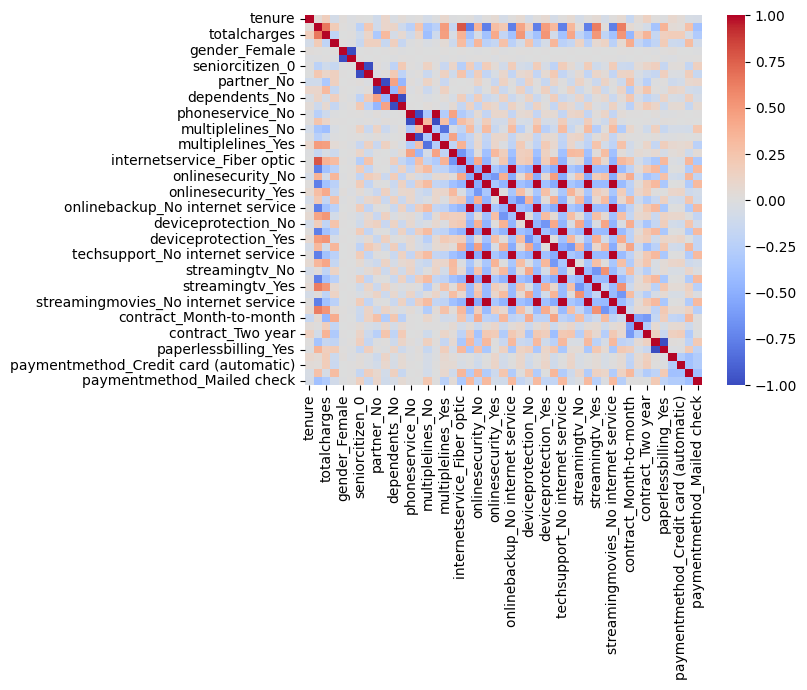

In [ ]:
plt.figsize=(25, 25)
sns.heatmap(df_model.corr(), cmap='coolwarm')

<Axes: >

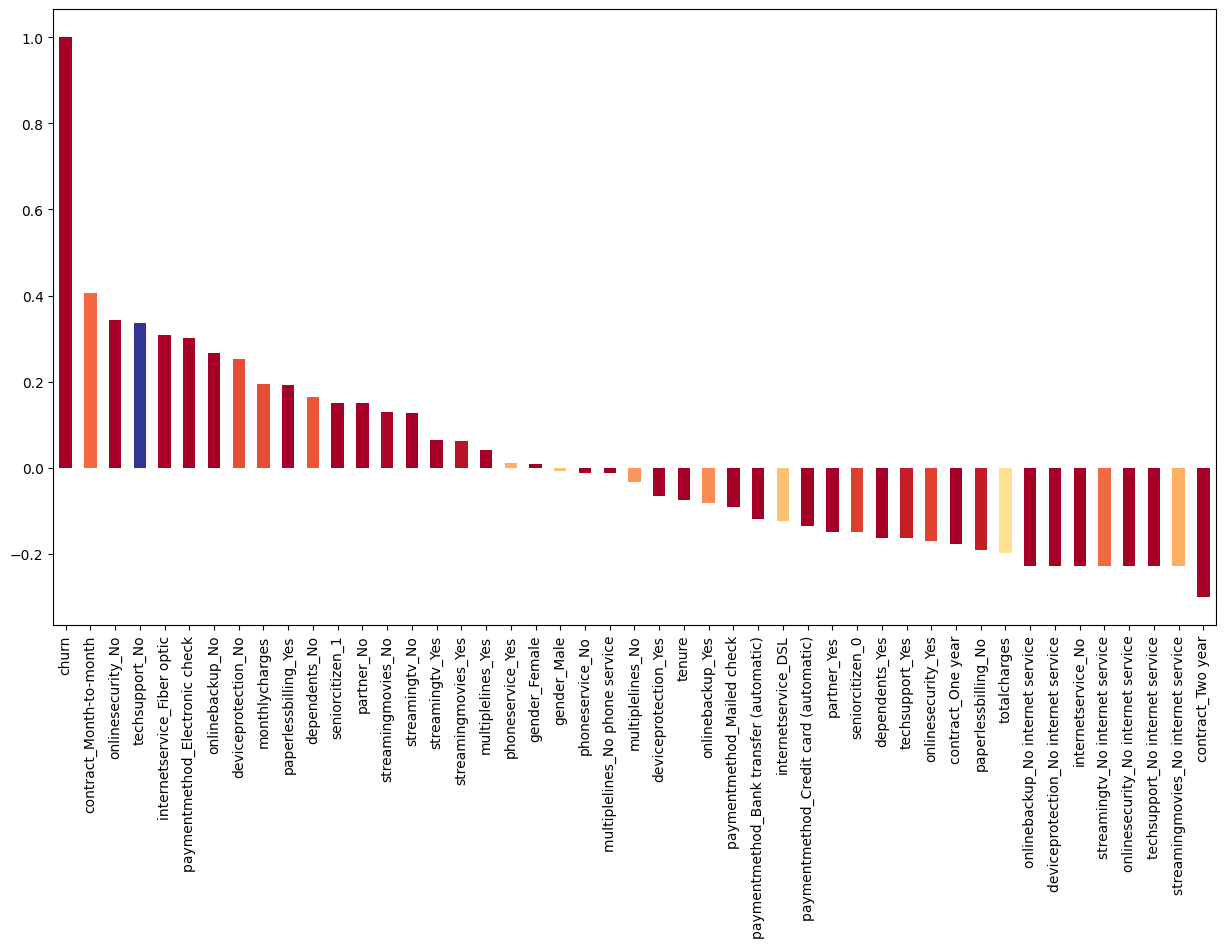

In [ ]:
# Plotting Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
cmap = plt.get_cmap('RdYlBu')
colors = cmap(df_model.corr()['churn'].values)
df_model.corr()['churn'].sort_values(ascending = False).plot(kind='bar', color=colors)

Visualisasi yang paling berkorelasi pada setiap kolom

In [ ]:
df_model.head()

,tenure,monthlycharges,totalcharges,churn,gender_Female,gender_Male,seniorcitizen_0,seniorcitizen_1,partner_No,partner_Yes,...,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,-0.295590,-1.161527,-0.994085,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,-0.009599,-0.260463,-0.173703,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,-0.286924,-0.363537,-0.959544,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0.085731,-0.747569,-0.195209,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,-0.286924,0.196719,-0.940354,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


#**Modelling**

In [ ]:
# Decision Tree
dt = DecisionTreeClassifier(criterion='gini',splitter='best')
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# Random Forest
rf = RandomForestClassifier(criterion='gini')
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# XGBoost
xgb_model = xgb.XGBClassifier(learning_rate= 0.1)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

In [ ]:
def display_model(image_url, title):
    image = Image(url=image_url, width=900, height=450)
    display(Markdown(f"### {title}"))
    display(image)

# Daftar model dan URL gambar
models = [
    ("https://softscients.com/wp-content/uploads/2020/05/1.-Decision-Tree.png", "Algoritma Decision Tree"),
    ("https://miro.medium.com/v2/resize:fit:1400/1*ZFuMI_HrI3jt2Wlay73IUQ.png", "Algoritma Random Forest"),
    ("https://docs.aws.amazon.com/id_id/sagemaker/latest/dg/images/xgboost_illustration.png", "Algoritma XGBoost")
]

# Tampilkan gambar dan judul dengan fungsi display_model
for model_url, model_title in models:
    display_model(model_url, model_title)

### Algoritma Decision Tree

### Algoritma Random Forest

### Algoritma XGBoost

# **Evaluation**

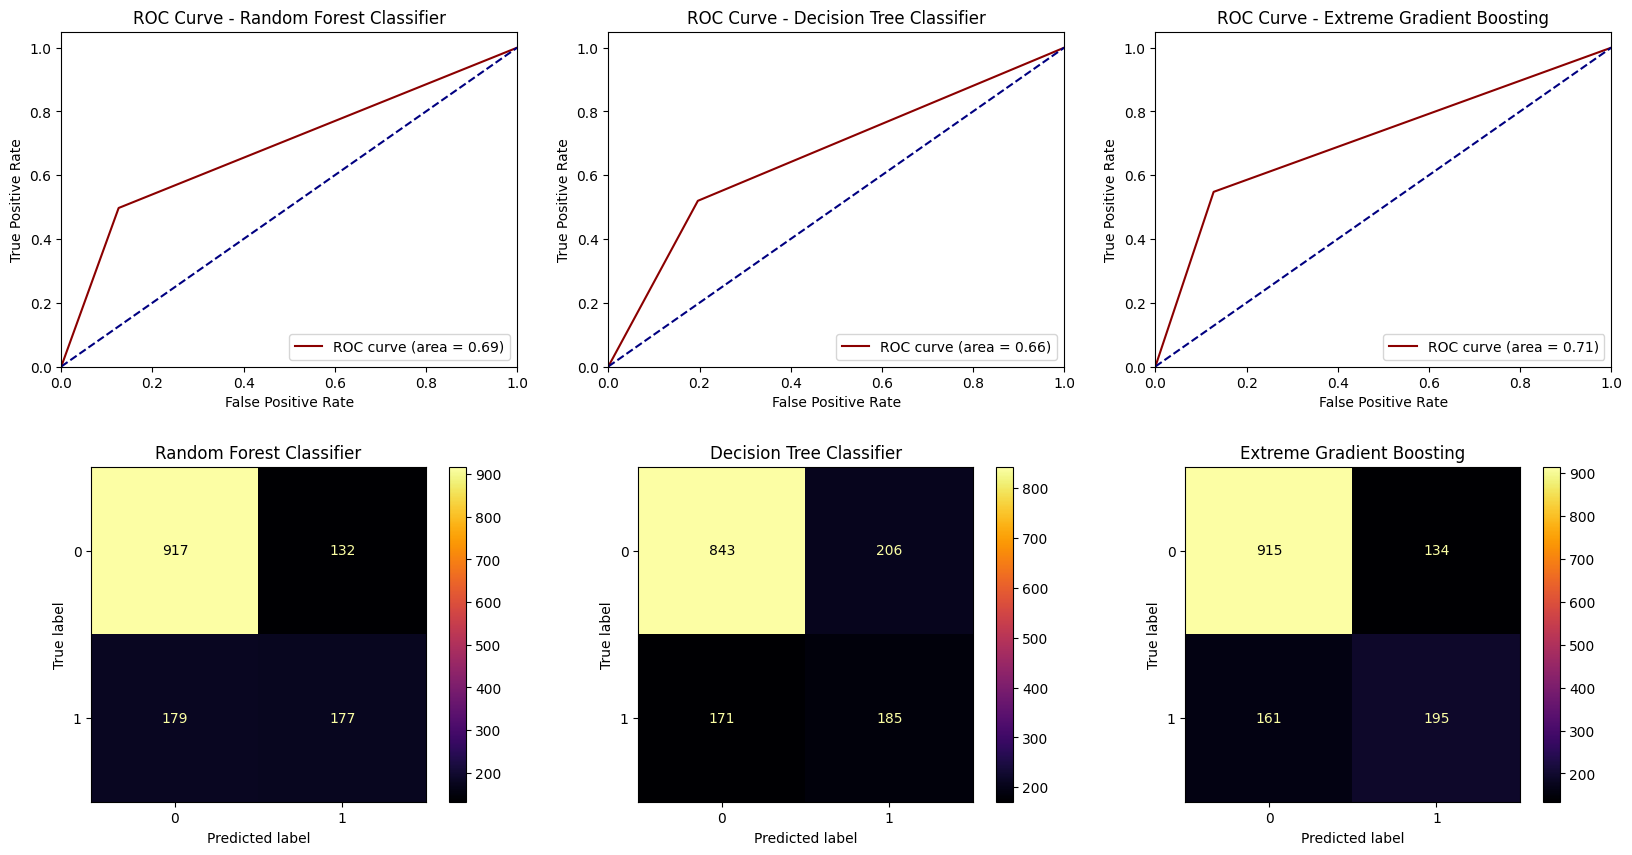

,Accuracy (%),Precision (%),Recall (%),ROC-AUC (%),F1-Score (%)
Random Forest Classifier,77.864769,57.281553,49.719101,68.567844,53.233083
Decision Tree Classifier,73.167260,47.314578,51.966292,66.164271,49.531459
Extreme Gradient Boosting,79.003559,59.270517,54.775281,71.000605,56.934307


In [ ]:
# buat list model dan nama model
models = [rf, dt, xgb_model]
model_names = ['Random Forest Classifier', 'Decision Tree Classifier', 'Extreme Gradient Boosting']

# inisialisasi list untuk menyimpan hasil evaluasi
acc_scores = []
pre_scores = []
rec_scores = []
roc_scores = []
f1_scores = []

# buat figure dan axes untuk menampilkan visualisasi
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

# loop untuk setiap model
for i, model in enumerate(models):
    # prediksi target variabel pada data uji
    y_pred = model.predict(X_test)

    # hitung confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # hitung nilai roc-auc
    roc = roc_auc_score(y_test, y_pred)

    # hitung false positive rate (fpr) dan true positive rate (tpr) untuk kurva roc
    fpr, tpr, _ = roc_curve(y_test, y_pred)

    # tampilkan kurva roc
    roc_display = axes[0,i].plot(fpr, tpr, color='darkred', label='ROC curve (area = %0.2f)' % roc)
    roc_display = axes[0,i].plot([0, 1], [0, 1], color='navy', linestyle='--')
    roc_display = axes[0,i].set_xlim([0.0, 1.0])
    roc_display = axes[0,i].set_ylim([0.0, 1.05])
    roc_display = axes[0,i].set_xlabel('False Positive Rate')
    roc_display = axes[0,i].set_ylabel('True Positive Rate')
    roc_display = axes[0,i].set_title('ROC Curve - ' + model_names[i])
    roc_display = axes[0,i].legend(loc="lower right")

    # tambahkan baris kosong
    fig.subplots_adjust(hspace=0.3)

    # tampilkan confusion matrix
    cm_display = ConfusionMatrixDisplay(cm).plot(ax=axes[1,i], cmap='inferno')
    cm_display.ax_.set_title(model_names[i])

    # hitung true negative, false positive, false negative, true positive
    tn, fp, fn, tp = cm.ravel()

    # hitung akurasi, precision, recall, dan f1-score
    ac = (tp + tn) / (tp + fp + fn + tn)
    pr = tp / (tp + fp)
    rc = tp / (tp + fn)
    f1 = (2 * pr * rc) / (pr+rc)

    # simpan hasil evaluasi pada list
    acc_scores.append(ac * 100)
    pre_scores.append(pr * 100)
    rec_scores.append(rc * 100)
    roc_scores.append(roc * 100)
    f1_scores.append(f1 * 100)

# tampilkan visualisasi
plt.show()

# buat dataframe dari hasil evaluasi
df_eval = pd.DataFrame({'': model_names,
                        'Accuracy (%)': acc_scores,
                        'Precision (%)': pre_scores,
                        'Recall (%)': rec_scores,
                        'ROC-AUC (%)': roc_scores,
                        'F1-Score (%)': f1_scores})

# set index dataframe menjadi kosong
df_eval = df_eval.set_index('')

# ubah nama axis pada index dan kolom
df_eval = df_eval.rename_axis(None, axis=0).rename_axis('', axis=1)

# menampilkan dataframe dengan style untuk highlight nilai tertinggi
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

df_eval = df_eval.style.apply(highlight_max, axis=0)

# tampilkan dataframe
display(df_eval)

Dari hasil evaluasi Diatas maka dilihat dari model yang terbaik adalah **XGBoost** untuk memprediksi dengan mempertimbangkan confusion matrix akurasi sebesar 79.003559

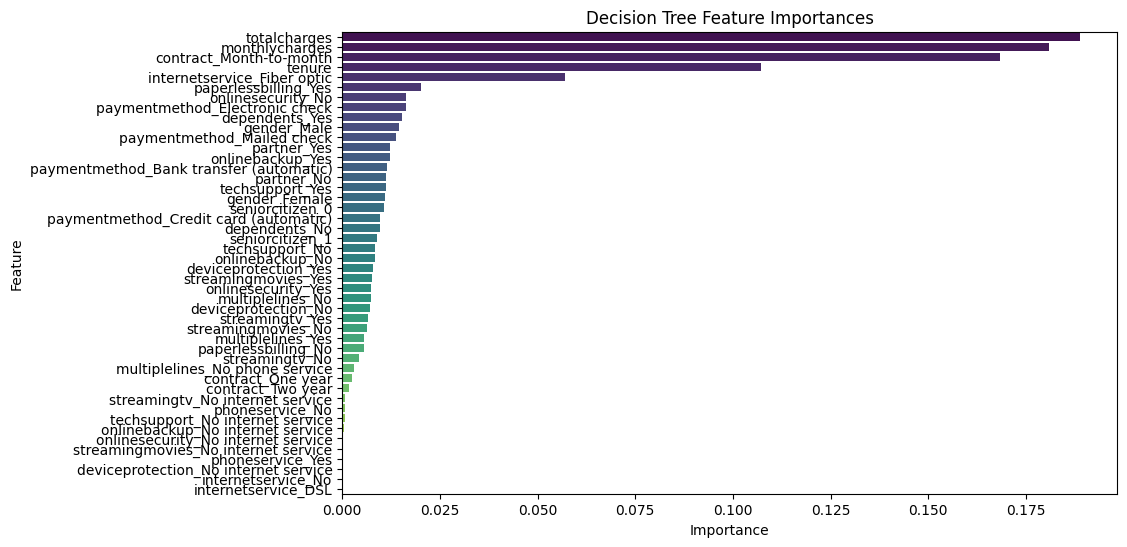

In [ ]:
feature_names = X.columns
# Decision Tree Feature Importance
dt_fi = dt.feature_importances_

# Membuat DataFrame feature importance
dt_fi_df = pd.DataFrame({'Feature': feature_names, 'Importance': dt_fi})
dt_fi_df = dt_fi_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))

# Membuat bar plot untuk feature importances
sns.barplot(x='Importance', y='Feature', data=dt_fi_df, palette='viridis')
plt.title('Decision Tree Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Menampilkan plot
plt.show()

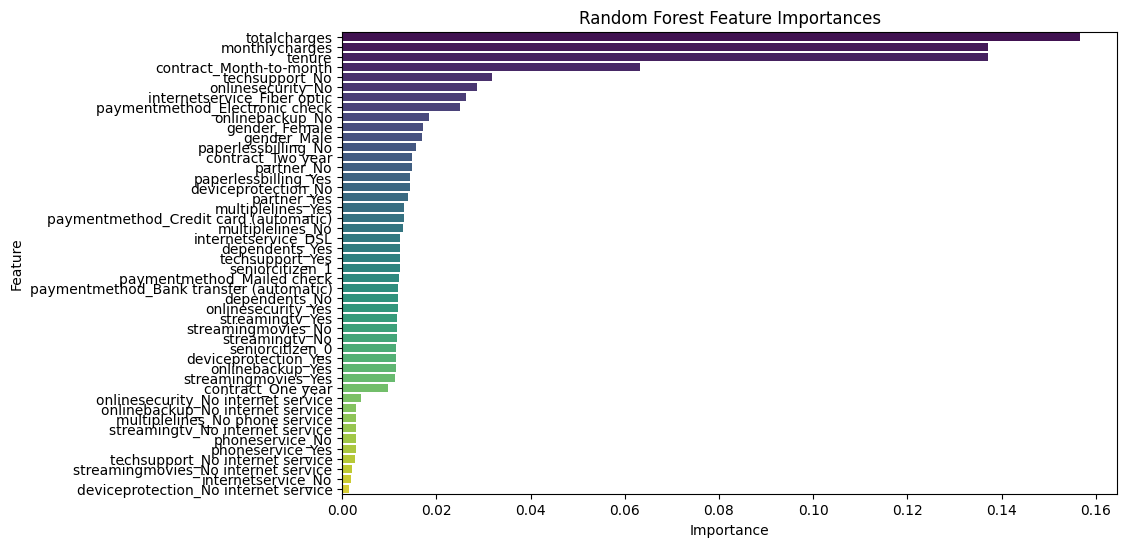

In [ ]:
# Random Forest Feature Importance
rf_fi = rf.feature_importances_

# Membuat DataFrame feature importance
rf_fi_df = pd.DataFrame({'Feature': feature_names, 'Importance': rf_fi})
rf_fi_df = rf_fi_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))

# Membuat bar plot untuk feature importances
sns.barplot(x='Importance', y='Feature', data=rf_fi_df, palette='viridis')
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Menampilkan plot
plt.show()

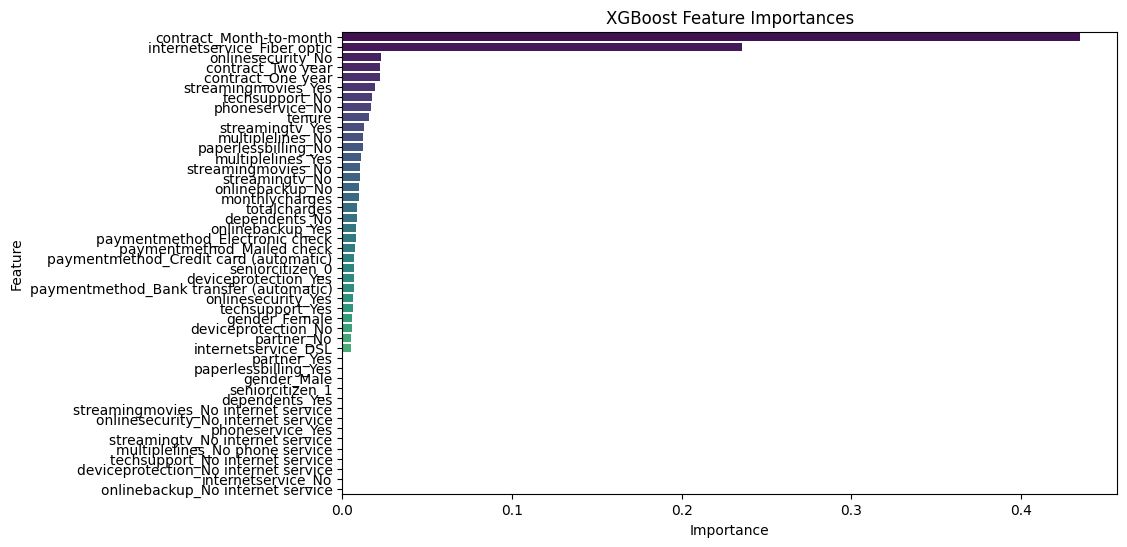

In [ ]:
# XGBoost Feature Importance
xgb_fi = xgb_model.feature_importances_

# Membuat DataFrame feature importance
xgb_fi_df = pd.DataFrame({'Feature': feature_names, 'Importance': xgb_fi})
xgb_fi_df = xgb_fi_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))

# Membuat bar plot untuk feature importances
sns.barplot(x='Importance', y='Feature', data=xgb_fi_df, palette='viridis')
plt.title('XGBoost Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Menampilkan plot
plt.show()

# **Deployment**

Rekomendasi Perusahaan agar mengurangi kehilangan pelanggan yaitu dengan
- Melakukan promosi harga dan paket layanan berlanggan pada jangka waktu tahunan
- Mengurangi penggunaan internet fiber optik
- Memperketat online security agar menjaga privasi pelanggan

In [ ]:
link = 'https://raw.githubusercontent.com/arubhasy/dataset/main/Telco-Customer-Churn.csv'
new_data = pd.read_csv(link)

In [ ]:
# Merubah kolom SeniorCitizen menjadi Kategorikal
new_data['SeniorCitizen'] = new_data['SeniorCitizen'].astype('object')
# Merubah kolom TotalCharges menjadi numerik
new_data['TotalCharges'] = pd.to_numeric(new_data['TotalCharges'],errors='coerce')

# Mengonversi semua kolom menjadi huruf kecil
new_data.columns = new_data.columns.str.lower()

# Hapus Missing Value
new_data.dropna(inplace=True)

# Mengganti nilai 'F' dengan 'Female' dan 'M' dengan 'Male'
new_data['gender'] = new_data['gender'].replace({'F': 'Female', 'M': 'Male'})

# Menghapus kolom yang tidak penting
columns_drop = ['customerid',]
new_data = new_data.drop(columns=columns_drop)

new_data.drop('churn', axis=1, inplace=True)
pred = new_data
new_data.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [ ]:
numerical = list(new_data.select_dtypes(include = ['number']).columns)
new_data[numerical].describe()

,tenure,monthlycharges,totalcharges
count,7025.000000,7025.000000,7025.000000
mean,35.107616,64.783573,2283.251964
std,115.396389,30.077709,2266.970388
min,1.000000,18.250000,18.800000
25%,9.000000,35.550000,401.300000
50%,29.000000,70.350000,1396.900000
75%,56.000000,89.850000,3794.500000
max,7100.000000,118.750000,8684.800000


In [ ]:
# Membuat instance dari StandardScaler
scaler = StandardScaler()
new_data[numerical] = scaler.fit_transform(new_data[numerical])

In [ ]:
# Encoding use one hot encoder
new_data = pd.get_dummies(new_data)
new_data.head()

<ipython-input-255-bad33785795b>:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_data = pd.get_dummies(new_data)


,tenure,monthlycharges,totalcharges,gender_Female,gender_Male,seniorcitizen_0,seniorcitizen_1,partner_No,partner_Yes,dependents_No,...,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,-0.295590,-1.161527,-0.994085,1,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,-0.009599,-0.260463,-0.173703,0,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,-0.286924,-0.363537,-0.959544,0,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0.085731,-0.747569,-0.195209,0,1,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,-0.286924,0.196719,-0.940354,1,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
# rf_pred = rf.predict(new_data)
# new_data['churn_prediction'] = rf_pred
# new_data

In [ ]:
dt_predictions = dt.predict(new_data)
rf_predictions = rf.predict(new_data)
xgb_predictions = xgb_model.predict(new_data)
combined_data = pred.copy()  # copy kedalam dataset baru

# Menambahkan kolom untuk masing-masing model agar lebih mudah untuk dicompare
combined_data['DT_Predictions'] = dt_predictions
combined_data['RF_Predictions'] = rf_predictions
combined_data['XGB_Predictions'] = xgb_predictions



In [ ]:
combined_data

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,...,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,DT_Predictions,RF_Predictions,XGB_Predictions
0,Female,0,Yes,No,-0.295590,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,-1.161527,-0.994085,0,0,1
1,Male,0,No,No,-0.009599,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,-0.260463,-0.173703,0,0,0
2,Male,0,No,No,-0.286924,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,-0.363537,-0.959544,1,1,0
3,Male,0,No,No,0.085731,No,No phone service,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),-0.747569,-0.195209,0,0,0
4,Female,0,No,No,-0.286924,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,0.196719,-0.940354,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,-0.096263,Yes,Yes,DSL,Yes,No,...,Yes,Yes,One year,Yes,Mailed check,0.665538,-0.129147,0,0,0
7039,Female,0,Yes,Yes,0.319724,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,One year,Yes,Credit card (automatic),1.277330,2.240880,0,0,0
7040,Female,0,Yes,Yes,-0.208926,No,No phone service,DSL,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,-1.169839,-0.854418,0,0,0
7041,Male,1,Yes,No,-0.269591,Yes,Yes,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Mailed check,0.319742,-0.871998,1,1,1
